# PROJECT: Modeling Magnetic Resonance using QuTiP
#### Maastricht Science Programme, Project Period January 2022

- Little explanation here ??

**Magnetic resonance** can be observed in rotating charged particles (exhibiting magnetic dipole), which are set in an external magnetic field consisting of a static and an oscillating components.

**NMR** is a subtype of magnetic resonnace, where the phenomenon typically applies to re-orientation of a nucleus in an applied magnetic field.

**Spin-1/2 particle**, such as an electron or a protons, is said to be a two-level particle as it can be found in two different quantum spin states, spin-up or spin-down.

*This notebook explains a simple **model of magnetic resonance of a proton.***


###### **Literature resources:**
- Beck (especially 9.4 and 9A.1)
- Griffiths
- [QuTiP: Quantum Toolbox in Python - documentation](https://qutip.org/docs/latest/index.html)

Start by importing necessary libraries:

In [328]:
#use import as to avoid overwriting methods of different packages
import qutip as qt
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt # importing only parts of library saves a lot of space
import math, cmath

import ipywidgets as widgets
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from qutip.ipynbtools import version_table


%matplotlib inline

Define spin-1/2 states and operators:

In [264]:
#Spin states
pz = qt.Qobj([[1],[0]]) # +z
mz = qt.Qobj([[0],[1]]) # -z
px = qt.Qobj([[1/np.sqrt(2)],[1/np.sqrt(2)]])
mx = qt.Qobj([[1/np.sqrt(2)],[-1/np.sqrt(2)]])
py = qt.Qobj([[1/np.sqrt(2)],[1j/np.sqrt(2)]])
my = qt.Qobj([[1/np.sqrt(2)],[-1j/np.sqrt(2)]])
#Expectation values - observable spin components (equivalent to performing a measurement)
Sx = 1/2.0 * qt.sigmax()
Sy = 1/2.0 * qt.sigmay()
Sz = 1/2.0 * qt.sigmaz()
#Pauli matrices
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

## Plotting on the Bloch Sphere

Source code can be found [here](https://qutip.org/docs/4.0.2/modules/qutip/bloch.html), and can be used to look for and understand specific methods that are not mentioned a lot in documentation (like `add_state()`).
Inspecting objects with `dir(obj)` can also be useful.

Documentation: __[guide-bloch](https://qutip.org/docs/latest/guide/guide-bloch.html)__

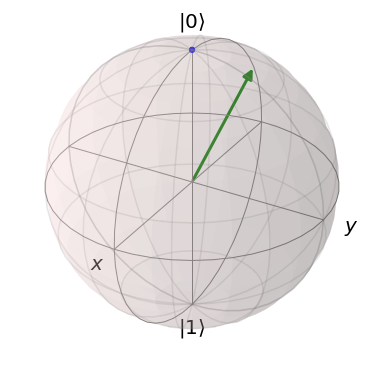

In [324]:
b = qt.Bloch() #create a Bloch sphere

#plotting a single state:
st1 = qt.Qobj(1/2*np.array([np.sqrt(3),-1])) #input [a,b]
b.add_states(st1) #transforms state into Bloch representation -> calculates angles to plot on sphere

#plotting a single point
north_pole = [0,0,1]
b.add_points(north_pole)

b.render() #render figure

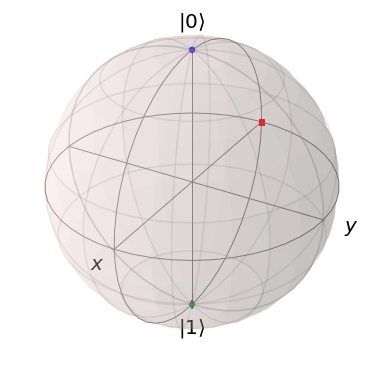

In [325]:
b.clear() #clear figure

#plotting two or more different STATES:
st_arr = [pz, mx, mz] #array of quantum states
b.add_states(st_arr, kind='point') #you can also plot it as points by changing kind (kind='point' or 'vector')

#plotting two or more different POINTS:
st_arr = [pz, mx, mz] #array of quantum states
b.add_states(st_arr, kind='point') #you can also plot it as points by changing kind (kind='point' or 'vector')

b.render()

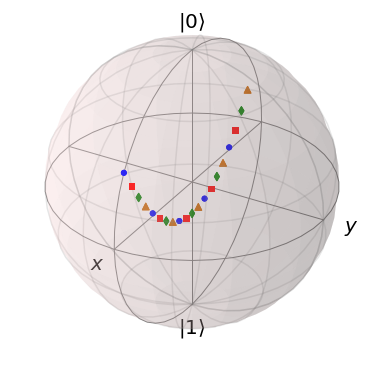

In [279]:
#plotting states in time with numpy:
b = qt.Bloch()

t = np.arange(-1,1,0.1)

st_arr = [qt.Qobj(1/2*np.array([time*np.sqrt(3),-1])) for time in t] #state at 0.1 time intervals

b.add_states(st_arr, kind='point')
b.render()

## Spin-1/2 particle in *static* magnetic field

In this part, we are simulating a particle of spin 1/2 at rest in a uniform magnetic field pointing in the z-axis.

Spin state, where constants a and b are determined by initial conditions:

$
\begin{align}
    \chi(t) &= \begin{bmatrix}
           a \\
           b \\
         \end{bmatrix}
         &= \begin{bmatrix}
           cos(\frac{\alpha}{2})e^{i\gamma B_0 t/2} \\
           sin(\frac{\alpha}{2})e^{-i\gamma B_0 t/2} \\
         \end{bmatrix}
\end{align}
$

In [199]:
#INITIAL CONDITIONS
gamma = 1 # gyromagnetic ratio
B0 = 1 # magnetic field strength
alpha = np.pi/6 # angle of precession -> determines the states (can also do the opposite)

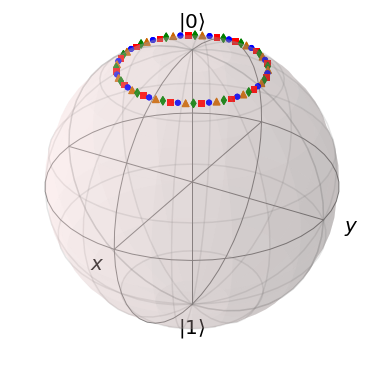

In [200]:
#BLOCH SPHERE REPRESENTATION OF TIME EVOLUTION
b = qt.Bloch()

t = np.arange(-math.pi, math.pi, 0.1)

#above equation in code for all times
xi_t = [qt.Qobj(np.array([math.cos(alpha/2)*cmath.exp(1j*gamma*B0*time/2),math.sin(alpha/2)*cmath.exp(-1j*gamma*B0*time/2)])) for time in t]

b.add_states(xi_t, kind='point')
b.render()

## Spin-1/2 particle in *oscillating* magnetic field

In this case, only one direction magnetic field,
$\overrightarrow{B} = B_0 cos(\omega t) \overrightarrow{u_z}$.

The Hamiltonian is given by:

$H = -\gamma \overrightarrow{B} \cdot S = -\gamma B_0 cos(\omega t) \hat S_z$

Assuming we want the spinor to start with $a=b=\frac{1}{\sqrt2}$, so in the up state with respect to x-axis.

Initial state:
$
\begin{align}
    \chi(0) &= \begin{bmatrix}
    \frac{1}{\sqrt{2}}
    \\
    \frac{1}{\sqrt{2}}
    \\
    \end{bmatrix}
\end{align}
$

State vector:

$
\begin{align}
    \chi(t) &= \frac{1}{\sqrt{2}} \begin{bmatrix}
           e^{i(\gamma B_0 /2\omega)\sin\omega t} \\
           e^{-i(\gamma B_0 /2\omega)\sin\omega t} \\
         \end{bmatrix}
\end{align}
$

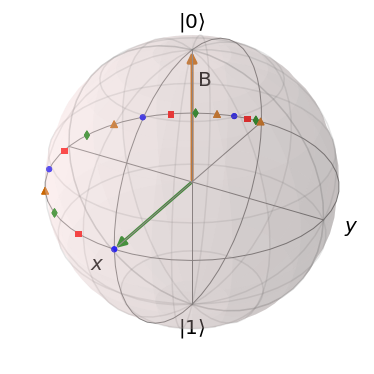

In [201]:
gamma = 1
w = 1 # oscillation freq

# strength needed to make a full spin state flip
B0 = math.pi*w/gamma

b = qt.Bloch()

t = np.arange(0, np.pi/2, 0.1)

xi_t = [qt.Qobj(1/math.sqrt(2)*np.array([cmath.exp(1j*(gamma*B0/(2*w))*cmath.sin(w*time)),cmath.exp(-1j*(gamma*B0/(2*w))*cmath.sin(w*time))])) for time in t]

b.add_vectors([1,0,0]) # initial state
b.add_vectors([0,0,1]) # magnetic field
b.add_annotation([0,0.1,0.8],'B')
b.add_states(xi_t, kind='point')
b.render()

## Numerical Estimations

Given a Hamiltonian, we can calculate the unitary (non-dissipative) time-evolution of an arbitrary state vector $\left|\psi_0\right>\\$ (psi0) using the QuTiP function **qutip.sesolve**. It evolves the state vector and evaluates the expectation values for a set of operators expt_ops at the points in time in the list times, using an ordinary differential equation solver based on Schrödinger equation. Alternatively, we can use the function **qutip.mesolve**, which allows for addition of collapse operators.

### First: solve spin-1/2 particle in static field:

The hamiltonian is:

\begin{align*}
    \hat H &= -\gamma B_0 \hat S_z \\
           &= -\gamma B_0 \frac{\hbar}{2} \hat\sigma_z
\end{align*}

and with natural units, $\hbar=1$. The function **qt.sigmaz()** gives the pauli matrix $\sigma_z$.

It is time independant, so we can follow [this](https://qutip.org/docs/3.1.0/guide/dynamics/dynamics-master.html).

In [202]:
gamma = 1
B0 = 1
w = 1
alpha = np.pi/6

t = np.arange(-math.pi, math.pi, 0.1)

#hamiltonian
H = -gamma*B0* qt.sigmaz()/2 # sigma?() determines also direction of mag field -> has to be aligned with magnetic moment

#initial state
#psi0 = qt.basis(2, 0) #this would have been for (1,0), spin-up state -> will be no rotation cuz alpha=0
psi0 = qt.Qobj(np.array([math.cos(alpha/2),math.sin(alpha/2)])) # -> determined initial state

result = qt.mesolve(H, psi0, t, [], [sx,sy,sz]) # last input: expectation value of observable operators -> these give expectation values of spin states


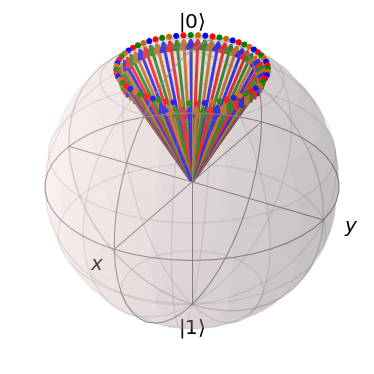

In [203]:
#result.expect[0] is expect for sx, result.expect[1] for sy, result.expect[2] for sz
st_arr = [[result.expect[0][i],result.expect[1][i],result.expect[2][i]] for i in range(len(result.expect[0]))]

b = qt.Bloch()
b.add_vectors(st_arr)
#OR
b.add_points([result.expect[0],result.expect[1],result.expect[2]], 'm') #'m'-multicolor, also 's' or 'l'
b.render()

### Second: solve spin-1/2 particle in oscillating field

The hamiltonian is: $\hat H = -\gamma \overrightarrow{B} \cdot \hat S = -\gamma B_z cos(\omega t) \hat S_z$

where $\Omega = \gamma B_z$ is the Larmor frequency.

It is a time-dependant Hamiltonian, so we follow [this](https://qutip.org/docs/3.1.0/guide/dynamics/dynamics-time.html). A very general way to write a time-dependent Hamiltonian or collapse operator is by using Python functions as the time-dependent coefficients. To accomplish this, we need to write a Python function that returns the time-dependent coefficient. Additionally, we need to tell QuTiP that a given Hamiltonian or collapse operator should be associated with a given Python function. To do this, one needs to specify operator-function pairs in list format: [Op, py_coeff], where Op is a given Hamiltonian or collapse operator and py_coeff is the name of the Python function representing the coefficient. FOLLOW EARLIER LINK FOR MORE INFO.

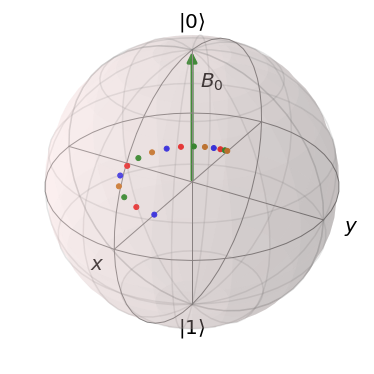

In [204]:
gamma = 42.6 * 2 * np.pi #gyromagnetic ratio
w = 1 #frequency of oscillation
Bz = math.pi*w/gamma #magnetic field strength
Bz_vec = [0,0,1]
omega = gamma * Bz # Larmor frequency (precession)

#initial state
psi0 = qt.Qobj(np.array([1/math.sqrt(2),1/math.sqrt(2)]))

#Hamiltonian
def H_coeff(t, args):
    return np.cos(w*t)
H = [-omega * Sz, H_coeff]

times = np.arange(0, np.pi/2, 0.1)

#Evolve in time & extract expectation values
result = qt.sesolve(H, psi0, times, [Sx, Sy, Sz])
expt_arr = [result.expect[0],result.expect[1],result.expect[2]]

#Plot on Bloch Sphere
b = qt.Bloch()
b.add_points(expt_arr, 'm')
b.add_vectors(Bz_vec)
b.add_annotation([0,0.15,0.8],'$B_0$')
b.render()

## Spin-1/2 particle in combination of static and oscillating magnetic field

### Numerical Approach

Magnetic field:

\begin{align*}
    \overrightarrow{B} &=  B_z \overrightarrow{u_z} + B_x \cdot \cos(\omega t) \cdot \overrightarrow{u_x}\\
\end{align*}

Hamiltonian:

\begin{align*}
    \hat H &= -\hat\mu \cdot \overrightarrow{B} \\
           &= -\gamma \hat{S}_z B_z - \gamma \hat S_x B_x \cos(\omega t)\\
           &= -\Omega_0 \hat{S}_z - \Omega_1 \hat{S}_x \cos(\omega t)
\end{align*}

with $\Omega_0=\gamma B_z$ and  $\Omega_1=\gamma B_x$.

The time independant part is $-\Omega_0 \hat{S}_z = -\Omega_0 \frac{\hbar}{2} \sigma_z$ and dependant $-\Omega_1 \hat{S}_x \cos(\omega t) = -\Omega_1\frac{\hbar}{2}\sigma_x\cos(\omega t)$. The initial state is $\left|0\right>$.

In [393]:
#arbitrarily chosen value
gamma = 1000 #proton Gyromagnetic ratio (my value but *10**6 --> would need many tiny steps)
Bz = 1     #static mag field strength in z-axis
Bx = 10e-6   #oscillating mag field strength in x-axis

#Larmor frequencies
omega0 = gamma*Bz
omega1 = gamma*Bx

#frequency of oscillating field
w = omega0 # this determines if resonance happens (w = Omega0)

#initial state
psi0 = pz #spin-up state

#Hamiltonian
def H_coeff(t, args):
    return np.cos(w*t)
H = [-omega0 * Sz, [-omega1 * Sx, H_coeff]]

times = np.arange(0.0, 1000, 0.2) #Arbitrary choice for time, will do better just below

#Evolve in time & extract expectation values
result = qt.mesolve(H, psi0, times, [], [Sx,Sy,Sz,mz*mz.dag()])
sx, sy, sz, Pmz = result.expect

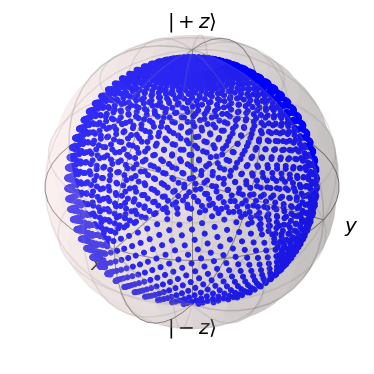

In [394]:
#Plot on Bloch Sphere
b = qt.Bloch()
expt_arr = [sx[::5],sy[::5],sz[::5]] #takes every 10th value
b.add_points(np.multiply(expt_arr, 1.7), 's') # adjust value for size on plot
b.add_vectors(Bz_vec)
b.add_annotation([0,0.15,0.8],'$B_z$')
b.zlabel = ['$\\left|+z\\right>$', '$\\left|-z\\right>$']
b.render()

#### Rabi Oscillations
There are a few things that we can learn from theory, that will help us manage the variables:

First, we can introduce the Rabi oscillations. These are the oscillation in the probability of being in a certain state. In this case it oscillates between $\left|0\right>$ and $\left|1\right>$. This probability pattern is theoretically described by Rabi's formula,

\begin{align*}
    P(-z,t) &=  P_{max}(\omega)\frac{1}{2}[1-\cos(\Omega_R t)]
\end{align*}

with

\begin{align*}
    \Omega_R &=  \sqrt{(\omega-\Omega_0)^2+(\Omega_1/2)^2}
\end{align*}

being the Rabi frequency. This is the frequency at which at which the probability of getting a flip is P_{max}, which itself is equal to 1 if $\omega = \Omega_0$. So to get a single state flip with 100% chance, we need to apply a oscillating magnetic field of frequency $\Omega_0$ for a time $t=\pi/\Omega_R$.




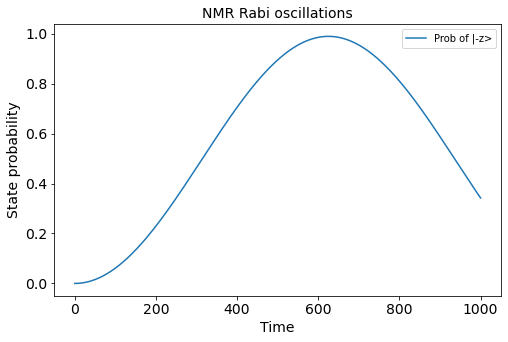

In [363]:
omegaR = np.sqrt((w - omega0)**2 + (omega1/2.0)**2)
# y axis not correct !!
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(times, Pmz, label="Prob of |-z>")
ax.legend()
ax.set_xlabel('Time', size=14)
plt.tick_params(labelsize=14)
ax.set_ylabel('State probability', size=14)
ax.set_title('NMR Rabi oscillations', size=14);

In [364]:
#arbitrarily chosen value
gamma = 1000 #proton Gyromagnetic ratio
Bz = 1       #static mag field strength in z-axis
Bx = 10e-6   #oscillating mag field strength in x-axis

omega_0 = gamma*Bz
omega_1 = gamma*Bx

w = gamma * Bz

omega_rabi = math.sqrt((w-omega_0)**2 + (omega_1/2)**2) #full equation, but because w = O_0, only O_1/2 is useful

t_rabi = math.pi/omega_rabi #time for a half Rabi cycle, so one flip

print("Time at which flip probability is 100%: " + str(t_rabi))

Time at which flip probability is 100%: 628.3185307179587


In [367]:
t = np.arange(0.0, t_rabi, 0.02)

result = qt.mesolve(H, psi0, t, [], [Sx,Sy,Sz,mz*mz.dag()])

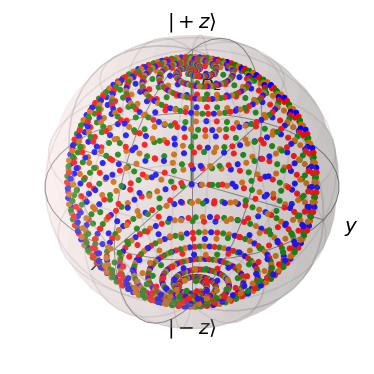

In [371]:
sx, sy, sz, Pmz = result.expect

#Plot on Bloch Sphere
expt_arr = [sx[::20], sy[::20], sz[::20]]  #takes every 5th value
b = qt.Bloch()
b.add_points(np.multiply(expt_arr,1.7), 'm')
b.add_vectors(Bz_vec)
b.add_annotation([0,0.15,0.8],'$B_z$')
b.zlabel = ['$\\left|+z\\right>$', '$\\left|-z\\right>$']
b.render()

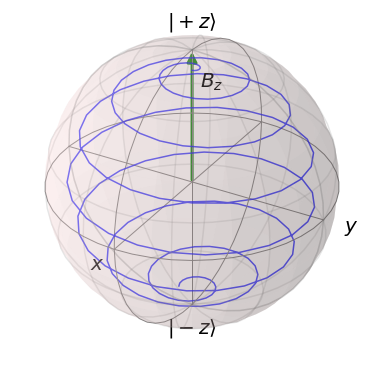

In [386]:
nb = 180 #all multiples of 60 work well for the shape
st_arr = [sx[::nb],sy[::nb],sz[::nb]]
b = qt.Bloch()
b.add_points(np.multiply(st_arr,1.7), 'l')
b.add_vectors(Bz_vec)
b.add_annotation([0,0.15,0.8],'$B_z$')
b.zlabel = ['$\\left|+z\\right>$', '$\\left|-z\\right>$']
b.render()

The Bloch sphere above does not show the state to go fully to the pole because of the number of points skipped in the plotting. In this case one point every 180 is plotted and this creates the correct path and this creates a certain amount of aliasing.

Next is the plot of the Rabi oscillations for half a cycle. This is the probability of measuring the $\left|+z\right>$ state.

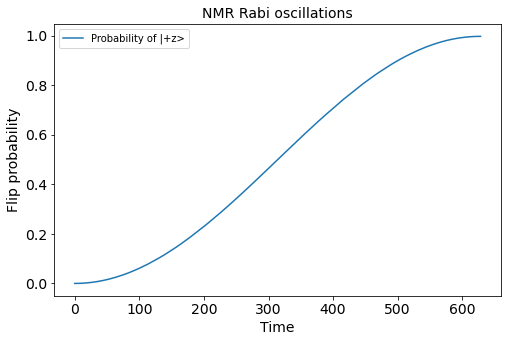

In [378]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t, Pmz, label="Probability of |+z>")
ax.legend()
ax.set_xlabel('Time', size=14)
ax.set_ylabel('Flip probability', size=14)
plt.tick_params(labelsize=14)
ax.set_title('NMR Rabi oscillations', size=14);

And the corresponding plot for probability of measuring $\left|-z\right>$ by simply doing $1-P(\left|+z\right>)$.

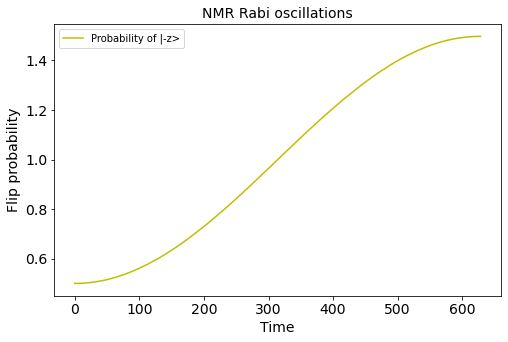

In [379]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t, 1-result.expect[2], label="Probability of |-z>", color='y')
ax.legend()
ax.set_xlabel('Time', size=14)
ax.set_ylabel('Flip probability', size=14)
plt.tick_params(labelsize=14)
ax.set_title('NMR Rabi oscillations', size=14);

Which is exactly the same as the theoretical Rabi oscillation given by

\begin{align*}
    P(-z,t) &=  P_{max}(\omega)\frac{1}{2}[1-\cos(\Omega_R t)]
\end{align*}

 as seen above, with $P_{max}(\omega)=1$ because $\omega = \Omega_0$.

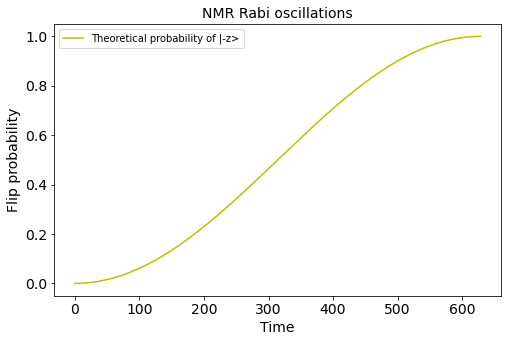

In [383]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(t, 0.5*(1-np.cos(O_rabi*t)), label="Theoretical probability of |-z>", color='y')
ax.legend()
ax.set_xlabel('Time', size=14)
ax.set_ylabel('Flip probability', size=14)
plt.tick_params(labelsize=14)
ax.set_title('NMR Rabi oscillations', size=14);

#### Simulation of the NMR and Rabi oscillation (single flip)

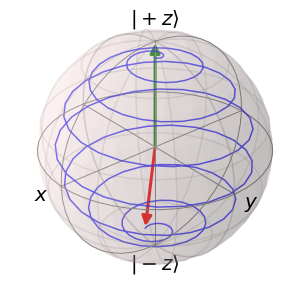

<Figure size 360x360 with 0 Axes>

In [389]:
nb = 180 #number of points skipped (every multiple of 60 looks good)

exp0 = sx[::nb]
exp1 = sy[::nb]
exp2 = sz[::nb]
st_arr = [sx[::nb],sy[::nb],sz[::nb]]

#First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30, auto_add_to_figure=False)
fig.add_axes(ax)
b = qt.Bloch(axes=ax)

#Animation function (called sequentially)
def animate(i): #generates new image each iteration
    b.clear()
    vector = [[sx[::nb][i], sy[::nb][i], sz[::nb][i]]] #new vector added where new point appears
    b.add_vectors(np.multiply(vector, 1.7))
    b.add_points(np.multiply([sx[::nb][:i+1], sy[::nb][:i+1],sz[::nb][:i+1]], 1.7),'l') #new point added
    b.add_vectors(Bz_vec)
    b.make_sphere()
    b.vector_color = ['r','g']
    b.add_annotation([0,0.15,0.8],'$B_z$')
    b.zlabel = ['$\\left|+z\\right>$', '$\\left|-z\\right>$']
    return ax

#Initialization function: plot the background of each frame
def init(): #keep vectors same color
    return ax

ani = animation.FuncAnimation(fig, animate, init_func=init, repeat=False, save_count=len(exp0))

ani.save('bloch_sphere_1Flip.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

In [ ]:
display.Video("bloch_sphere_1Flip.mp4")

#### Simulation of the NMR and Rabi oscillation (back and forth)

To see a full Rabi oscillation, we need to double the time that we had previously:

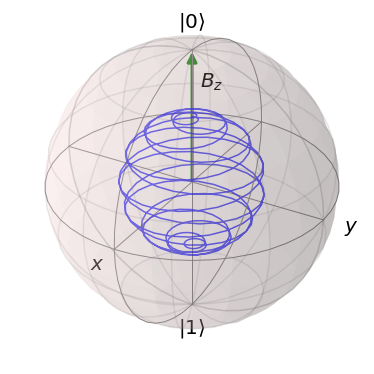

In [267]:
t = np.arange(0.0, 2*t_rabi, 0.02)

result = qt.mesolve(H, psi0, t, [], [Sx, Sy, Sz])
expt_arr = [result.expect[0][::15], result.expect[1][::15], result.expect[2][::15]]

nb = 180  #all multiples of 60 work well for the shape
st_arr = [result.expect[0][::nb], result.expect[1][::nb], result.expect[2][::nb]]
b = qt.Bloch()
b.add_points(st_arr, 'l')
b.add_vectors(Bz_vec)
b.add_annotation([0, 0.15, 0.8], '$B_z$')
b.render()

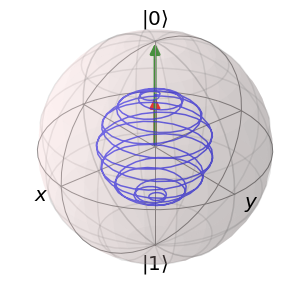

<Figure size 360x360 with 0 Axes>

In [268]:
nb = 180 #number of points skipped (every multiple of 60 looks good)

exp0 = result.expect[0][::nb]
exp1 = result.expect[1][::nb]
exp2 = result.expect[2][::nb]

#First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = Axes3D(fig, azim=-40, elev=30, auto_add_to_figure=False)
fig.add_axes(ax)
b = qt.Bloch(axes=ax)

#Animate
ani = animation.FuncAnimation(fig, animate, init_func=init, repeat=False, save_count=len(exp0))

ani.save('bloch_sphere_2Flips.mp4', fps=20, extra_args=['-vcodec', 'libx264']) #(saving as mp4 requires ffmpeg)

In [269]:
#Display animation (works in browser version of JN only)
display.Video("bloch_sphere_1Flip.mp4")

In [329]:
version_table()

Software,Version
QuTiP,4.6.2
Numpy,1.20.3
SciPy,1.7.1
matplotlib,3.4.3
Cython,0.29.24
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,7.29.0
Python,"3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]


In [216]:
gamma = 42.6 * 2 * np.pi # gyromagnetic ration of H
# initial state
psi0 = qt.Qobj(np.array([1/math.sqrt(2),1/math.sqrt(2)]))

t = np.arange(0, np.pi/2, 0.1)

b_z = 0.1 # magnetic field strength (vector)
# OSCILLATING magnetic field
b_x = 0.01 #
w = 0.2 # oscillating field frequency
# Larmor frequencies
omega_0 = gamma * b_z
omega_1 = gamma * b_x

"""Hamiltonian operator"""

def H_coeff(t, args): # coefficient function
    return omega_1 * math.cos(w*t)

#H_x = sigmaz(), H_coeff] # time-dependent hamiltonian
#H_z = sigmax()

H = [omega_0*qt.sigmax(), [qt.sigmaz(), H_coeff]]
print("Hamiltonian operator:", str(H))

"""Time Evolution by Schrodinger"""
result = qt.sesolve(H, psi0, times, [qt.sigmaz(), qt.sigmay(), qt.sigmax()])

expt_list = result.expect

Hamiltonian operator: [Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.         26.76636941]
 [26.76636941  0.        ]], [Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], <function H_coeff at 0x000002779DB19790>]]


In [ ]:

"""Make ANIMATION"""
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

# First set up the figure, the axis, and the plot element we want to animate
fig = pyplot.figure()
ax = Axes3D(fig, azim=-40, elev=30, auto_add_to_figure=False)
fig.add_axes(ax)
sphere = qt.Bloch(axes=ax)

# animation function (called sequentially)
def animate(i): # generates new image each iteration
    sphere.clear()
    vector = [[expt_list[0][i], expt_list[1][i], expt_list[2][i]]] # new vector added where new point appears
    sphere.add_vectors(vector)
    sphere.add_points([expt_list[0][:i+1], expt_list[1][:i+1],
                       expt_list[2][:i+1]]) # new point added
    magfield_vec = [0,0,1]
    sphere.add_vectors(magfield_vec)
    sphere.vector_colormagfield_vec = [0,0,1] # static mag field
    sphere.make_sphere()
    return ax

# initialization function: plot the background of each frame
def init(): # keep the vector same color
    sphere.vector_color = ['r','g']
    return ax

# call the animator.  blit=True means only re-draw the parts that have changed
ani = animation.FuncAnimation(fig, animate, init_func=init, repeat=False) # directly animates and saves under ani variable

# save the animation as mp4 (requires ffmpeg or mencoder to be installed)
# The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

video = ani.save('bloch_sphere.mp4', fps=20)

# play animation
display.display(html)
